###*Login to HF

### First, Ways of login to HF

In [ ]:
!pip install --upgrade huggingface_hub

| 🔢 Method                               | Code / Command                               | Used In                                                                                                                        | Description                                                                                       |
| --------------------------------------- | -------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------- |
| **1**                                   | `!huggingface-cli login`                     | Terminal / Colab / Jupyter (Shell cell)                                                                                      | CLI command. Prompts you to paste your HF token and saves it in global config. Works system-wide. |
| **2**                                   | `from huggingface_hub import HfApi`          |                                                                                                                                |                                                                                                   |
| `api = HfApi(token="YOUR_WRITE_TOKEN")` | Python Scripts / Automation                | Directly initializes an API object with token (temporary). Useful for scripting, CI/CD, etc. Doesn’t store token globally.     |                                                                                                   |
| **3**                                   | `from huggingface_hub import login`          |                                                                                                                                |                                                                                                   |
| `login("YOUR_TOKEN")`                   | Python Scripts                             | Programmatic login — stores token in local Hugging Face config (like CLI does). Good alternative to CLI login inside a script. |                                                                                                   |
| **4**                                   | `from huggingface_hub import notebook_login` |                                                                                                                                |                                                                                                   |
| `notebook_login()`                      | Jupyter / Colab Notebooks                  | Interactive login box inside notebooks. Token is saved in session/local config. Beginner-friendly.                             |                                                                                                   |


In [ ]:
from google.colab import userdata

In [ ]:
READ_TOKEN=userdata.get("HF_TOKEN_READ")

In [ ]:
WRITE_TOKEN=userdata.get('HF_TOKEN_WRITE')

In [ ]:
# import os
# os.environ["HF_READ_TOKEN"] = userdata.get("HF_READ_TOKEN")
# os.environ["HF_WRITE_TOKEN"] = userdata.get("HF_WRITE_TOKEN")


#### 1.Command Line Interface

In [ ]:
#This command tells Git to save your credentials (username + password or token) permanently in a plain text file on your computer,
#so you don’t have to enter them again when pushing/pulling from a remote repo.

In [ ]:
!git config --global credential.helper store

In [ ]:
!huggingface-cli login

⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
The token `testingliveread` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved in your co

In [ ]:
!huggingface-cli whoami

⚠️  Warning: 'huggingface-cli whoami' is deprecated. Use 'hf auth whoami' instead.
user:  Sahrul11


#### for this one you will have to use token with write permission

In [ ]:
!huggingface-cli repo create livehfcourse --repo-type model

⚠️  Warning: 'huggingface-cli repo' is deprecated. Use 'hf repo' instead.
Successfully created Sahrul11/livehfcourse on the Hub.
Your repo is now available at https://huggingface.co/Sahrul11/livehfcourse


In [ ]:
!huggingface-cli repo create livehfdatacourse --repo-type dataset

⚠️  Warning: 'huggingface-cli repo' is deprecated. Use 'hf repo' instead.
Successfully created Sahrul11/livehfdatacourse on the Hub.
Your repo is now available at https://huggingface.co/datasets/Sahrul11/livehfdatacourse


In [ ]:
!huggingface-cli repo create dummy --repo-type=space --space=docker

### 2. Via API

In [ ]:
import os
from huggingface_hub import HfApi
from google.colab import userdata

In [ ]:
api = HfApi(token=WRITE_TOKEN)



This command is a convenient way to programmatically create repositories on the Hugging Face Hub, which is useful for automating tasks like uploading models or datasets.


In [ ]:
api.create_repo(
    repo_id="Sahrul11/sahrulrepo",  # full path
    repo_type="model",                         # or just skip (default is model)
    private=False                              # set True for private repo
)

RepoUrl('https://huggingface.co/Sahrul11/sahrulrepo', endpoint='https://huggingface.co', repo_type='model', repo_id='Sahrul11/sahrulrepo')

In [ ]:
api.upload_file(
    path_or_fileobj="/content/testfile/config.json",
    path_in_repo="config.json",  # Where it goes in repo
    repo_id="Sahrul11/sahrulrepo"  # Same as created above
)

CommitInfo(commit_url='https://huggingface.co/Sahrul11/sahrulrepo/commit/7423b8983e3ba0b490542067253e49d94125e04a', commit_message='Upload config.json with huggingface_hub', commit_description='', oid='7423b8983e3ba0b490542067253e49d94125e04a', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Sahrul11/sahrulrepo', endpoint='https://huggingface.co', repo_type='model', repo_id='Sahrul11/sahrulrepo'), pr_revision=None, pr_num=None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 3.Via login

In [ ]:
from huggingface_hub import login

login(READ_TOKEN)

In [ ]:
from huggingface_hub import login

login(WRITE_TOKEN)

## Notebook login

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

## Install datasets library

In [ ]:
!pip install -U datasets fsspec

## Load the Dataset

In [ ]:
# import shutil
# shutil.rmtree("/root/.cache/huggingface/datasets", ignore_errors=True)

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset("stanfordnlp/imdb")  # IMDB movie review dataset

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


| Split       |  Description                                                                   |
| -------------- | -------------------------------------------------------------------------------- |
| `train`        | 25,000 examples → For training a sentiment classifier                            |
| `test`         | 25,000 examples → For evaluating your model                                      |
| `unsupervised` | 50,000 examples → No clean label (used for pretraining or self-supervised tasks) |

In [ ]:
print(dataset["train"])

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


In [ ]:
print(dataset["train"][0])

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [ ]:
print(dataset["train"].features)
print(dataset["train"].column_names)
print(dataset["train"].features["label"].names)
print(dataset["train"].num_rows)
print(dataset["train"].num_columns)
print(dataset["train"].shape)

{'text': Value('string'), 'label': ClassLabel(names=['neg', 'pos'])}
['text', 'label']
['neg', 'pos']
25000
2
(25000, 2)


In [ ]:
shuffled = dataset["train"].shuffle()

In [ ]:
shuffled

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
shuffled = dataset["train"].shuffle(seed=42)

In [ ]:
shuffled


Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
shuffled.select(range(100))

Dataset({
    features: ['text', 'label'],
    num_rows: 100
})

In [ ]:
# Random 5,000 samples from train split
subset_train = dataset["train"].shuffle(seed=42).select(range(5000))

In [ ]:
subset_train

Dataset({
    features: ['text', 'label'],
    num_rows: 5000
})

### preprocessing on dataset

This code snippet filters the train split of your dataset to keep only the examples where the length of the text field is less than 100 characters.

In [ ]:
dataset["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
short_reviews = dataset["train"].filter(lambda x: len(x["text"]) < 100)

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
short_reviews

Dataset({
    features: ['text', 'label'],
    num_rows: 9
})

In [ ]:
short_reviews = subset_train.filter(lambda x: len(x["text"]) < 100)

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
short_reviews

Dataset({
    features: ['text', 'label'],
    num_rows: 2
})

In [ ]:
short_positive = dataset["train"].filter(lambda x: x["label"] == 1 and len(x["text"]) < 200)

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
short_positive

Dataset({
    features: ['text', 'label'],
    num_rows: 60
})

In [ ]:
def add_word_count(example):
    example["word_count"] = len(example["text"].split())
    return example

In [ ]:
dataset = dataset.map(add_word_count)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'word_count'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'word_count'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'word_count'],
        num_rows: 50000
    })
})

In [ ]:
print(dataset["train"][0]["word_count"])

288


In [ ]:
print(dataset["train"][1]["word_count"])

214


In [ ]:
print(dataset["train"][2]["word_count"])

93


In [ ]:
split_dataset = dataset["train"].train_test_split(test_size=0.2)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'word_count'],
        num_rows: 20000
    })
    test: Dataset({
        features: ['text', 'label', 'word_count'],
        num_rows: 5000
    })
})

######openwebtext is a large-scale, internet-based corpus (similar to what GPT-2 was trained on), containing raw text scraped from web pages.

streaming=True
⚠️ Very important!

Normally, Hugging Face datasets are downloaded completely to disk before being used (especially for large datasets, this can be slow/heavy).

When streaming=True:

The dataset is not downloaded in full

Data is streamed sample-by-sample on-the-fly

Useful for huge datasets that can’t fit into memory (like c4, the_pile, openwebtext)

You get a generator-style iterable dataset, not an in-memory list

In [ ]:
big_data = load_dataset("c4", "en", streaming=True)

RuntimeError: Dataset scripts are no longer supported, but found c4.py

In [ ]:
big_data

| Part                  | Meaning                                                 |
| --------------------- | ------------------------------------------------------- |
| `IterableDatasetDict` | Dictionary-like object with splits (`train`, etc.)      |
| `train`               | Only split provided in `openwebtext`                    |
| `features: ['text']`  | Each example is a dict: `{"text": "...large block..."}` |
| `num_shards: 21`      | Internally it's chunked into 21 streamable parts        |


Dataset: openwebtext

Size: ~8.13 million documents

Total tokens: ~40+ billion tokens

Size on disk: ~38 GB

In [ ]:
for item in big_data["train"].take(5):
    print(item)

c4 → Colossal Clean Crawled Corpus
Full Form:
C4 = Colossal Clean Crawled Corpus

It was introduced in the T5 paper (Text-to-Text Transfer Transformer) by Google and used as its main pretraining dataset.

"c4"	The dataset ID (web-crawled dataset)

"en"	Subset config → English-only version

In [ ]:
web_crawled_data = load_dataset("c4", "en", split="train", streaming=True)

In [ ]:
for i, item in enumerate(web_crawled_data):
    print(item)
    if i > 4:
        break

Dataset: tweet_eval – Sentiment Classification Task

Full Name: TweetEval: Unified Benchmark for Tweet Classification Tasks

This dataset comes from the TweetEval paper and includes multiple Twitter-specific NLP tasks.

In [ ]:
# Load Dataset
dataset = load_dataset("tweet_eval", "sentiment")

In [ ]:
dataset

| Part          | Meaning                                    |
| ------------- | ------------------------------------------ |
| `tweet_eval`  | Dataset collection for Twitter NLP         |
| `"sentiment"` | Subset task: sentiment classification      |
| Labels        | 0 = Negative, 1 = Neutral, 2 = Positive    |
| Use case      | Train/test sentiment classifiers on tweets |


In [ ]:
import matplotlib.pyplot as plt
labels = [example["label"] for example in dataset["train"]]
plt.hist(labels, bins=3, edgecolor="black")
plt.xticks([0,1,2], ["Negative", "Neutral", "Positive"])
plt.title("Tweet Sentiment Distribution")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
label_counts = Counter([ex["label"] for ex in dataset["train"]])
labels = ["Negative", "Neutral", "Positive"]
counts = [label_counts[i] for i in range(3)]

In [ ]:
counts

In [ ]:
plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Sentiment Proportions (Pie Chart)")
plt.axis("equal")
plt.show()


In [ ]:
from collections import Counter
import re
all_words = []
for i in range(1000):
    words = re.findall(r"\w+", dataset["train"][i]["text"].lower())
    all_words.extend(words)
top_words = Counter(all_words).most_common(20)
words, counts = zip(*top_words)

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(words, counts, color="orange")
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Tweets")
plt.tight_layout()
plt.show()

What is a Word Cloud?

A Word Cloud (a.k.a. text cloud or tag cloud) is a visual representation of text data where more frequent words appear larger and less frequent words appear smaller.

It's like a frequency heatmap — but in word form 🌥️

| Purpose                                                |  Benefit                                                      |
| --------------------------------------------------------- | --------------------------------------------------------------- |
| ✅ See most frequent words                                 | Helps you understand what's commonly talked about in a dataset  |
| ✅ Spot noise or junk tokens                               | E.g., unnecessary punctuation, stopwords                        |
| ✅ Compare two groups (e.g., positive vs negative reviews) | You can generate separate word clouds to understand differences |
| ✅ Preprocessing validation                                | Check if text cleaning worked or not                            |
| ✅ Topic discovery                                         | Gives a rough sense of what themes are present                  |


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_text = " ".join(dataset["train"][i]["text"] for i in range(1000))
wordcloud = WordCloud(width=800, height=400).generate(all_text)

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets")
plt.show()

In [ ]:
from wordcloud import WordCloud

for label_id, label_name in enumerate(["Negative", "Neutral", "Positive"]):
    text = " ".join(example["text"] for example in dataset["train"] if example["label"] == label_id)
    wc = WordCloud(width=800, height=400).generate(text)

    plt.figure(figsize=(10, 4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {label_name} Tweets")
    plt.show()

## Custom dataset

In [ ]:
from datasets import Dataset
import pandas as pd

data = {
    "text": [
        "I love this product! Works great ",
        "Terrible experience, I want a refund.",
        "Fast delivery and excellent packaging.",
        "Worst app I’ve ever used. Crashed in 1 minute.",
        "Super helpful support team, thanks a lot!",
        "Nothing worked. Waste of time."
    ],
    "label": [1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
}

In [ ]:
data

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
dataset = Dataset.from_pandas(df)

In [ ]:
dataset

In [ ]:
dataset = dataset.class_encode_column("label")  # optional: make label a ClassLabel

In [ ]:
dataset

In [ ]:
import os
from google.colab import userdata
os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN_WRITE")

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from huggingface_hub import whoami
print(whoami())

In [ ]:
dataset.push_to_hub("sunny199/mycustomdata")

### Tokenization

#### Install the transformer library

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
def tokenize(example):
    return tokenizer(example, truncation=True, padding="max_length")

In [ ]:
dataset["text"][0]

In [ ]:
tokenize(dataset["text"][0])

In [ ]:
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length")

In [ ]:
encoded_dataset = dataset.map(tokenize, batched=True)

In [ ]:
encoded_dataset

In [ ]:
encoded_dataset['input_ids'][0]

In [ ]:
encoded_dataset['token_type_ids'][0]

In [ ]:
tokenizer

In [ ]:
tokens=tokenizer.tokenize("Hello HuggingFace!")

In [ ]:
tokens

In [ ]:
tokens = tokenizer.tokenize("Hello, how are you?")

In [ ]:
tokens

In [ ]:
hindi_tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-bert")

In [ ]:
tokens=hindi_tokenizer.tokenize("मुझे एआई पसंद है।")

In [ ]:
tokens

In [ ]:
inputs = tokenizer("Hello, how are you?", return_tensors="pt")

In [ ]:
inputs

1. input_ids:

These are the IDs of the tokens from the model’s vocabulary.

The sentence "Hello, how are you?" gets tokenized as:

[CLS] Hello , how are you ? [SEP]

Which corresponds to:

[101, 7592, 1010, 2129, 2024, 2017, 1029, 102]

2. token_type_ids:

These are used in tasks like Next Sentence Prediction.

0 means it's part of the first sentence

If there was a second sentence, it would have 1s

Since your input is just a single sentence, all values are 0.

3. attention_mask:

Tells the model which tokens are real and which are padding.

1 means the token is real (not padding)

0 means it’s padding (none here)

What does return_tensors="pt" do?

It returns everything as PyTorch tensors (pt = PyTorch).

If you use return_tensors="tf", you'll get TensorFlow tensors.

### How to tokenize large dataset faster

In [ ]:
import time
text = ["This is a sample sentence for tokenization."] * 100000

In [ ]:
# Fast
start = time.time()
tok_fast = AutoTokenizer.from_pretrained("bert-base-cased", use_fast=True)
tok_fast(text, padding=True, truncation=True)
print("Fast Time:", time.time() - start)

Fast Time: 7.79060173034668


In [ ]:
# Slow
start = time.time()
tok_slow = AutoTokenizer.from_pretrained("bert-base-cased", use_fast=False)
tok_slow(text, padding=True, truncation=True)
print("Slow Time:", time.time() - start)

Slow Time: 57.42144298553467


| Feature         | Fast Tokenizer (`use_fast=True`)       | Slow Tokenizer (`use_fast=False`) |
| --------------- | -------------------------------------- | --------------------------------- |
| Backend         | Built in **Rust** (super fast)       | Built in **Python** (slower)   |
| Tokenizer Class | `BertTokenizerFast`                    | `BertTokenizer`                   |
| Speed           | Very fast                           | Much slower                    |
| Library Used    | `tokenizers` (Rust)                    | `transformers` (pure Python)      |
| Memory usage    | Slightly higher (due to Rust overhead) | Lower                             |


## Do you wanna create your own tokenizer?

### Here You're training your own custom tokenizer from scratch using the Byte Pair Encoding (BPE) algorithm, with Hugging Face’s fast tokenizers library.

Below code creates a custom tokenizer from your own small dataset using the BPE algorithm, with:

Whitespace splitting,

100-token vocabulary,

Trained from scratch.

Byte Pair Encoding (BPE) is a subword tokenization algorithm that helps break down words into smaller pieces (subwords), making it especially useful for handling rare words and unknown words in NLP tasks.

In [ ]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
corpus = ["I love transformers!", "Tokenizers are amazing.", "Build your own.\n"]

In [ ]:
corpus

['I love transformers!', 'Tokenizers are amazing.', 'Build your own.\n']

In [ ]:
tokenizer = Tokenizer(models.BPE())

In [ ]:
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

In [ ]:
trainer = trainers.BpeTrainer(vocab_size=100)

In [ ]:
tokenizer.train_from_iterator(corpus, trainer)

In [ ]:
# Save
tokenizer.save("custom-tokenizer.json")

In [ ]:
from transformers import PreTrainedTokenizerFast

hf_tokenizer = PreTrainedTokenizerFast(
    tokenizer_file="/content/custom-tokenizer.json",
    unk_token="[UNK]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    sep_token="[SEP]",
    mask_token="[MASK]"
)

In [ ]:
hf_tokenizer.save_pretrained("my_tokenizer_hf")

('my_tokenizer_hf/tokenizer_config.json',
 'my_tokenizer_hf/special_tokens_map.json',
 'my_tokenizer_hf/tokenizer.json')

### Now load the model

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
inputs = tokenizer("Hello, how are you?", return_tensors="pt")

In [ ]:
model = AutoModel.from_pretrained("bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
import torch
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
print(outputs)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.5926,  0.0308,  0.0145,  ...,  0.0067,  0.3493,  0.8801],
         [ 0.1507,  0.0496,  0.2720,  ...,  0.2301,  0.5543, -0.0939],
         [-0.2256, -0.2712, -0.1375,  ..., -0.1161,  0.3052,  0.2588],
         ...,
         [ 0.0476, -0.2572,  0.1349,  ..., -0.0117,  0.2032, -0.3086],
         [-0.3472, -0.3266, -0.1795,  ...,  0.1174,  0.1640,  0.1084],
         [ 0.4908,  0.0212, -0.5450,  ...,  0.3898, -0.8815, -0.1950]]]), pooler_output=tensor([[-0.8022, -0.2630, -0.1854,  0.6802,  0.1868, -0.1122,  0.8362,  0.2401,
          0.0944, -1.0000,  0.2043,  0.4669,  0.9673, -0.0077,  0.8546, -0.6579,
         -0.2406, -0.5455,  0.2931, -0.7109,  0.5054,  0.9991,  0.3039,  0.0447,
          0.3704,  0.6754, -0.4500,  0.8508,  0.9005,  0.6868, -0.7000,  0.0976,
         -0.9757, -0.2793, -0.7820, -0.9846,  0.2343, -0.6590, -0.2036,  0.0143,
         -0.8721,  0.2757,  0.9995,  0.0810,  0.1829, -0.3071, -1.0000,  0.

In [ ]:
print(outputs.last_hidden_state.shape)

torch.Size([1, 8, 768])


In [ ]:
print(outputs.last_hidden_state[0])

tensor([[-0.5926,  0.0308,  0.0145,  ...,  0.0067,  0.3493,  0.8801],
        [ 0.1507,  0.0496,  0.2720,  ...,  0.2301,  0.5543, -0.0939],
        [-0.2256, -0.2712, -0.1375,  ..., -0.1161,  0.3052,  0.2588],
        ...,
        [ 0.0476, -0.2572,  0.1349,  ..., -0.0117,  0.2032, -0.3086],
        [-0.3472, -0.3266, -0.1795,  ...,  0.1174,  0.1640,  0.1084],
        [ 0.4908,  0.0212, -0.5450,  ...,  0.3898, -0.8815, -0.1950]])


In [ ]:
print(len(outputs.last_hidden_state[0][0]))

768


In [ ]:
print(outputs.last_hidden_state[0][1])

tensor([ 1.5067e-01,  4.9639e-02,  2.7199e-01, -1.5809e-01, -9.9807e-01,
         1.0181e+00,  1.7554e-01,  1.8175e-02,  2.6187e-01, -4.3263e-01,
        -1.7804e-01,  1.4513e-01,  8.9847e-02,  1.9775e-01,  5.6893e-02,
         1.9172e-01,  7.0332e-01, -3.5588e-01, -3.1450e-01, -8.3647e-02,
         5.0433e-03,  2.7537e-01, -1.1248e-01,  1.4812e-01,  3.8843e-01,
         2.3346e-01, -4.7778e-01,  4.3134e-01, -2.5266e-01, -1.7150e-01,
         4.0567e-02,  5.6989e-01,  9.3908e-02, -1.8602e-01, -7.6705e-02,
        -2.9313e-01, -3.0815e-01, -2.3387e-02,  3.0542e-01, -1.8034e-01,
        -2.0432e-01, -4.0805e-01,  3.1521e-01, -3.7773e-01,  2.3314e-01,
        -1.4773e-01, -5.5564e-01, -3.6896e-01,  2.0067e-01, -4.4344e-01,
        -5.0081e-01, -5.2682e-02,  1.7192e-01, -1.8931e-01, -7.6242e-01,
         1.9173e-01,  1.2783e-01, -4.0351e-01,  7.0757e-01, -2.4162e-01,
        -2.8039e-01, -2.3971e-01,  2.6485e-01,  1.5072e-01, -4.4924e-01,
         3.5315e-01, -5.2120e-02,  5.6799e-01, -4.6

In [ ]:
len(outputs.last_hidden_state[0].mean(dim=0))

768

In [ ]:
outputs.last_hidden_state[0].mean(dim=0)

tensor([-7.7886e-02, -1.8506e-01, -5.5181e-02, -2.2716e-01, -3.1420e-01,
         5.3859e-01,  2.3405e-01,  2.3922e-01, -1.4405e-01, -4.3122e-01,
         1.3988e-02, -3.0623e-02,  3.4487e-01,  2.5994e-02, -1.0015e-01,
         4.5765e-01,  2.8707e-01, -4.8671e-01, -3.6734e-01, -1.4599e-02,
         1.6112e-01,  1.0721e-01, -1.8380e-01, -1.1710e-01,  1.7982e-01,
         2.6337e-01, -5.2540e-01, -1.9899e-01, -3.0859e-01,  4.2176e-02,
         8.5977e-02,  2.6567e-01, -1.7630e-01, -1.2612e-01,  3.3400e-02,
        -1.1151e-02, -5.1767e-02,  2.4688e-02,  2.5934e-01,  4.7010e-02,
        -7.6531e-02,  1.4843e-01,  1.6839e-01,  8.6923e-02, -2.1280e-01,
        -2.2211e-01, -7.8016e-01,  2.3640e-01, -2.4787e-02, -8.3998e-01,
        -5.2191e-01, -1.0566e-01,  4.8204e-01, -1.4478e-01, -6.3111e-01,
         3.0310e-01,  2.0124e-01, -3.1654e-01,  4.4297e-01, -4.5775e-02,
        -4.2841e-01,  5.3829e-02,  7.1854e-02,  3.1441e-01, -2.5105e-01,
         4.2042e-01, -5.1456e-01,  6.0759e-01, -5.8

In [ ]:
# print(outputs.last_hidden_state[0, 0])


[Multi-head Attention] → [Add + Norm] → [Feedforward] → [Add + Norm]


### Lets Perform a small Practical

In [ ]:
from torch.nn.functional import cosine_similarity

In [ ]:
sentence1 = "Hello, how are you?"
sentence2 = "Hi, how do you do?"

In [ ]:
inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

In [ ]:
with torch.no_grad():
    output1 = model(**inputs1).last_hidden_state[0].mean(dim=0)
    output2 = model(**inputs2).last_hidden_state[0].mean(dim=0)

In [ ]:
similarity = cosine_similarity(output1, output2, dim=0)
print(f"Similarity: {similarity.item():.4f}")

Similarity: 0.8895


## sentence transformer library: https://huggingface.co/sentence-transformers

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
# Load a sentence embedding model (trained for similarity tasks)
model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Step 1: Encode both sentences into embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)

In [ ]:
embedding1

tensor([ 1.9097e-02,  3.4465e-02,  9.1628e-02,  7.0165e-02, -2.9947e-02,
        -8.4191e-02,  4.5814e-02,  4.9586e-03, -9.1893e-02,  1.7401e-02,
        -8.8161e-03, -6.6145e-04, -2.8557e-02, -2.1950e-02,  5.5167e-02,
        -4.9836e-02,  8.9881e-02, -8.8957e-02, -1.1236e-01,  3.9001e-02,
        -6.6071e-02,  2.6095e-02,  3.6531e-02,  6.1390e-02, -5.7125e-02,
        -5.4639e-02,  3.0366e-02,  3.2388e-02,  1.2645e-02, -1.0569e-01,
        -5.8346e-02,  6.7329e-02, -4.0756e-02,  6.4398e-03,  5.6987e-03,
         5.2853e-02, -3.9775e-02, -1.1855e-01,  2.1162e-03, -1.6693e-02,
         2.8338e-02, -3.7438e-02, -2.1371e-02, -4.1475e-02,  8.4972e-02,
        -6.8694e-02,  2.4652e-02,  7.1668e-02,  1.0130e-01,  4.6517e-03,
        -1.0044e-01, -3.4094e-02, -4.0176e-02,  3.6907e-02,  6.0806e-02,
         4.1485e-02, -6.4642e-02,  4.0750e-03,  6.7232e-02, -9.0081e-03,
         2.8548e-02,  3.9759e-02, -8.3564e-02,  7.8186e-02,  4.7506e-02,
        -3.4571e-02, -7.5742e-02, -5.4552e-02, -3.2

In [ ]:
len(embedding1)

384

In [ ]:
embedding2 = model.encode(sentence2, convert_to_tensor=True)

In [ ]:
embedding2

tensor([ 7.9273e-03,  1.0824e-02,  6.4440e-02,  4.1073e-02, -5.5623e-02,
        -2.4012e-02,  3.3522e-02, -1.3802e-02, -3.6286e-02, -1.3766e-02,
        -9.2297e-03, -2.7551e-02, -2.6325e-02, -5.5530e-02,  5.6302e-02,
         1.6543e-02, -4.4173e-02,  7.4477e-02, -1.2451e-01, -2.6206e-02,
         1.3162e-02, -9.1665e-02, -3.2998e-02, -1.4401e-02,  3.6053e-02,
        -4.9651e-02,  1.4674e-02,  6.0289e-02, -1.6662e-02, -5.2136e-02,
         2.7662e-02,  5.0990e-02,  9.2509e-03,  2.3633e-02, -5.3486e-02,
         2.0829e-02, -2.8609e-02, -6.6983e-02,  2.3909e-03, -4.8774e-02,
         4.8256e-02, -7.1694e-02, -2.1886e-02,  2.9340e-02,  3.2780e-02,
        -5.9117e-02, -3.6032e-02,  2.3597e-02,  7.0321e-02,  2.6210e-02,
        -9.3737e-02, -6.2379e-02, -3.5960e-02,  6.2627e-02,  1.2345e-02,
         7.7443e-02,  2.0380e-03,  1.2663e-02,  5.9305e-02, -7.8939e-03,
         4.6994e-03,  2.1612e-02, -5.0623e-02,  8.7753e-02,  3.8511e-03,
        -3.5347e-02, -4.3526e-02, -3.0914e-02, -1.4

In [ ]:
similarity = cosine_similarity(embedding1, embedding2, dim=0)
print(f"Similarity: {similarity.item():.4f}")

Similarity: 0.5163


## Example of AutoModelClass with Different heads

| Task                        | Class Name                                          | Description                                          |
| --------------------------- | --------------------------------------------------- | ---------------------------------------------------- |
| Base Model               | `AutoModel`                                         | Just embeddings (no head), for feature extraction    |
| Masked LM                | `AutoModelForMaskedLM`                              | For BERT-style `[MASK]` prediction                   |
| Sequence Classification | `AutoModelForSequenceClassification`                | For sentence-level tasks like sentiment, spam        |
| Token Classification     | `AutoModelForTokenClassification`                   | For NER, POS tagging (token-level labels)            |
| Multiple Choice          | `AutoModelForMultipleChoice`                        | For MCQ tasks (e.g., SWAG dataset)                   |
| Next Sentence Prediction | `AutoModelForNextSentencePrediction`                | For NSP (mainly BERT pretraining)                    |
| Causal LM (Text Gen)     | `AutoModelForCausalLM`                              | For GPT-style models (left-to-right text generation) |
| Seq2Seq LM               | `AutoModelForSeq2SeqLM`                             | For translation, summarization (T5, BART)            |
| Question Answering       | `AutoModelForQuestionAnswering`                     | For extractive QA (SQuAD-style)                      |
| Vision Tasks            | `AutoModelForImageClassification`, etc.             | For image classification (e.g., ViT)                 |
| Audio Tasks              | `AutoModelForAudioClassification`, etc.             | For Wav2Vec, Whisper, etc.                           |
| Conditional Generation   | `AutoModelForConditionalGeneration`                 | For T5/BART-style seq2seq tasks                      |
| Zero-shot Tasks          | `AutoModelForZeroShotClassification` (via pipeline) | For inference without fine-tuning                    |
| Contrastive Learning     | `AutoModelForContrastiveLearning`                   | For embeddings comparison tasks                      |


In [ ]:
sentence = "I am doing very happy"

In [ ]:
inputs = tokenizer(sentence, return_tensors="pt")

In [ ]:
inputs

{'input_ids': tensor([[ 101,  146, 1821, 1833, 1304, 2816,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
inputs.pop("token_type_ids")

tensor([[0, 0, 0, 0, 0, 0, 0]])

In [ ]:
inputs

{'input_ids': tensor([[ 101,  146, 1821, 1833, 1304, 2816,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
from transformers import AutoModelForSequenceClassification

In [ ]:
clf_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import torch
with torch.no_grad():
    outputs = clf_model(**inputs)

In [ ]:
logits = outputs.logits

In [ ]:
predicted_class = torch.argmax(logits, dim=1)

In [ ]:
print(predicted_class.item())  # 1 = Positive, 0 = Negative

0


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [ ]:
gpt_tok = AutoTokenizer.from_pretrained("gpt2")
gpt_model = AutoModelForCausalLM.from_pretrained("gpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
sentence = "Transformers are beast"

In [ ]:
gpt_inputs = gpt_tok(sentence, return_tensors="pt")

In [ ]:
with torch.no_grad():
    gpt_output = gpt_model.generate(
        gpt_inputs["input_ids"],
        max_length=gpt_inputs["input_ids"].shape[1] + 5,  # predict next 5 tokens
        do_sample=False  # deterministic output
    )


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [ ]:
generated_text = gpt_tok.decode(gpt_output[0], skip_special_tokens=True)

In [ ]:
print("GPT-2 generated:", generated_text)

GPT-2 generated: Transformers are beastly creatures that can be


In [ ]:
from transformers import AutoConfig, AutoModel

In [ ]:
config = AutoConfig.from_pretrained("bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
print(config.hidden_size)
print(config.num_attention_heads)
print(config.vocab_size)
print(config.hidden_act)  # shows which activation function is used
print(config.num_labels)

768
12
30522
gelu
2


In [ ]:
config.num_labels = 5  # change for multi-class classification

In [ ]:
print(config.num_labels)

5


In [ ]:
model = AutoModel.from_config(config)  # No pretrained weights

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

| Feature                      | `AutoModel`, `AutoModelForSequenceClassification`, etc. | `AutoConfig`     |
| ---------------------------- | ------------------------------------------------------- | ---------------- |
| Load Pretrained Weights?     | ✅ Yes                                                   | ❌ No             |
| Returns Model?               | ✅ Yes (BERT, DistilBERT, etc.)                          | ❌ No             |
| Used for Training/Inference? | ✅                                                       | ❌ (only config)  |
| Editable for Custom Models?  | Limited                                                 | ✅ Fully Editable |


#### If you want to download the model on your local machine then follow below code

In [ ]:
from huggingface_hub import snapshot_download

In [ ]:
snapshot_download(
    repo_id="bert-base-uncased",
    local_dir="/content/test",   # where to download
    local_dir_use_symlinks=False  # to copy instead of symlinking
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:982: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.mlmodel:   0%|          | 0.00/165k [00:00<?, ?B/s]

flax_model.msgpack:   0%|          | 0.00/438M [00:00<?, ?B/s]

Manifest.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/491 [00:00<?, ?B/s]

coreml/fill-mask/float32_model.mlpackage(…):   0%|          | 0.00/532M [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/532M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/534M [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/536M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

'/content/test'

### Load the model

In [ ]:
from transformers import AutoTokenizer, AutoModel

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("/content/test")

In [ ]:
tokenizer

BertTokenizerFast(name_or_path='/content/test', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [ ]:
model = AutoModel.from_pretrained("/content/test")

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

# Inbuilt Pipeline method

| Parameter           | Type                        | Description / Use Case                                                               |
| ------------------- | --------------------------- | ------------------------------------------------------------------------------------ |
| `task`              | `str`                       | Task name like `"text-classification"`, `"text-generation"`, `"summarization"`, etc. |
| `model`             | `str` or `PreTrainedModel`  | Model name (e.g., `"bert-base-uncased"`) or loaded model object                      |
| `tokenizer`         | `str` or Tokenizer Object   | Optional – auto-loaded from model if not given                                       |
| `config`            | `str` or `PretrainedConfig` | Optional – custom configuration (e.g., num labels, dropout, etc.)                    |
| `framework`         | `str` (`"pt"` or `"tf"`)    | Force PyTorch or TensorFlow (auto-detected if not set)                               |
| `device`            | `int` or `str`              | `0` = GPU, `-1` = CPU, `"cuda"` or `"cpu"`                                           |
| `revision`          | `str`                       | Git branch/tag/commit from Hugging Face Hub (e.g., `"main"`, `"v1.0"`)               |
| `use_fast`          | `bool`                      | Whether to use fast tokenizer (defaults to `True`)                                   |
| `token`             | `str` or `bool`             | Hugging Face token (needed for private models or rate limits)                        |
| `device_map`        | `Any`                       | For multi-GPU / model parallelism                                                    |
| `torch_dtype`       | `torch.dtype`               | Force precision: e.g., `torch.float16` for faster inference                          |
| `trust_remote_code` | `bool`                      | Allow loading custom `model.py` logic from HF repo (for advanced/custom models)      |
| `model_kwargs`      | `dict`                      | Extra arguments to pass to model (e.g., `temperature`, `top_p`, `max_length`, etc.)  |
| `feature_extractor` | `str` or Object             | Used for older vision/audio models (now replaced by `image_processor`)               |
| `image_processor`   | `BaseImageProcessor`        | For image tasks (used in ViT, SAM, etc.)                                             |
| `processor`         | `ProcessorMixin`            | For multi-modal models (e.g., Whisper, CLIP, LayoutLMv3)                             |
| `pipeline_class`    | `Any`                       | Custom pipeline class if you’re extending or modifying the base pipeline logic       |
| `**kwargs`          | `Any`                       | Additional pipeline-specific keyword arguments (like `max_length`, `top_k`, etc.)    |


In [ ]:
from transformers import pipeline

In [ ]:
classifier=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
classifier("i will learn AI throughout my entire life it is like a passion")

[{'label': 'POSITIVE', 'score': 0.9987781643867493}]

In [ ]:
classifier("mera dost don hai")

[{'label': 'NEGATIVE', 'score': 0.9647197723388672}]

In [ ]:
result = pipeline("sentiment-analysis")("Hugging Face is awesome")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998747110366821}]


In [ ]:
lassifier=pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
res = lassifier(
    "This is a course about Python list comprehension",
    candidate_labels=["education", "politics", "business"],
)

In [ ]:
print(res)

{'sequence': 'This is a course about Python list comprehension', 'labels': ['education', 'business', 'politics'], 'scores': [0.9622026681900024, 0.026841413229703903, 0.010955973528325558]}


In [ ]:
generation=pipeline("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
generation("python is a simple language what is your thought?")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'python is a simple language what is your thought?\n\n[Update: Check out the latest development in the GitHub issue tracker!]'}]

In [ ]:
generation("hello how are you?")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "hello how are you?\n\nI'm glad to answer that, however I have to be honest, I don't know how many people I've met who are like me, or that I've met that person before. I don't know how many people I've met who are like me, or that I've met that person before. I don't know how many people I've met who are like me, or that I've met that person before. I don't know how many people I've met who are like me, or that I've met that person before. I don't know how many people I've met who are like me, or that I've met that person before. I don't know how many people I've met who are like me, or that I've met that person before. I don't know how many people I've met who are like me, or that I've met that person before.\n\nI've had people ask me how I'm doing and I've just told them I've been doing it. The more I told them, the more they said they understood and they'd be like, oh that's cool. I'm not going to say that I'm a terrible person. I think I'm just the most beautif

In [ ]:
summarizer=pipeline("summarization", model="google/long-t5-tglobal-base")

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
text="A large language model (LLM) is a machine learning model that uses deep learning to perform natural language processing (NLP) tasks. LLMs are trained on large amounts of text to learn how to respond to user requests with human-like language."

In [ ]:
print(summarizer(text,max_length=100))

Your max_length is set to 100, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[{'summary_text': ' A large language model (LLM) is a machine learning model that uses deep learning to perform natural language processing (NLP) tasks . LLMs are trained on large amounts of text to learn how to respond to user requests with human-like language . LLM is trained on . large amounts . of text .'}]


| Property          | Value                                                             |
| ----------------- | ----------------------------------------------------------------- |
| **Model Name**    | `google/long-t5-tglobal-base`                                     |
| **Architecture**  | Long-T5 (based on T5 but designed for *long documents*)           |
| **Type**          | Encoder-decoder Transformer (seq2seq)                             |
| **Token Limit**   | Can handle **16,384 tokens** (way more than normal T5 → 512/1024) |
| **Attention**     | Uses **"Transverse Global Attention"**, better for long contexts  |
| **Pretrained By** | Google Research                                                   |
| **Tasks**         | Mainly for **summarization**, also good for long text generation  |
| **Variants**      | `base`, `large`, `xl` – you are using `base`                      |


In [ ]:
summarizer = pipeline("summarization", model="google/long-t5-tglobal-base")

In [ ]:
summary = summarizer(text, max_length=50, min_length=10, do_sample=False)

Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [ ]:
print(summary[0]['summary_text'])

LLMs are trained on large amounts of text to learn how to respond to user requests with human-like language.


In [ ]:
qa = pipeline("question-answering")
print(qa(question="Where do I work?", context="I work at Hugging Face."))

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


{'score': 0.9494979114388116, 'start': 10, 'end': 22, 'answer': 'Hugging Face'}


In [ ]:
from transformers import pipeline
import time

texts = ["I absolutely love transformers!"] * 100

In [ ]:
# BERT
start = time.time()
bert = pipeline("sentiment-analysis", model="bert-base-uncased")
bert(texts)
print("BERT Time:", time.time() - start)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


BERT Time: 26.322044134140015


In [ ]:
# DistilBERT
start = time.time()
distil = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
distil(texts)
print("DistilBERT Time:", time.time() - start)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


DistilBERT Time: 7.027196168899536


## Evalution Matrixs

In [ ]:
!pip install evaluate
!pip install rouge_score
!pip install evaluate[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=9aaaaee66356d437b906a2dbdc8382189c8692a81e6927794d39a6c5184e831a
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [ ]:
!pip install -U datasets fsspec

  Using cached fsspec-2025.7.0-py3-none-any.whl.metadata (12 kB)


In [ ]:
import evaluate

In [ ]:
accuracy = evaluate.load("accuracy")

In [ ]:
result = accuracy.compute(predictions=[0, 1, 1, 0], references=[0, 1, 0, 0])

In [ ]:
print(result)

{'accuracy': 0.75}


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments

In [ ]:
# Load dataset subsets
train_dataset = load_dataset("imdb", split="train[:100]")
test_dataset = load_dataset("imdb", split="test[:100]")

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
# Load pretrained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Tokenize and format
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length")

In [ ]:
# Tokenize train and test
train_encoded = train_dataset.map(tokenize, batched=True)
test_encoded = test_dataset.map(tokenize, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
# Format for PyTorch
train_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
# Define Trainer with metrics
args = TrainingArguments(output_dir="eval-check", per_device_eval_batch_size=32,report_to="none")

In [ ]:
trainer = Trainer(model=model, args=args, compute_metrics=compute_metrics)

In [ ]:
metrics = trainer.evaluate(eval_dataset=test_encoded)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
print(metrics)

{'eval_loss': 0.7210216522216797, 'eval_model_preparation_time': 0.0017, 'eval_accuracy': 0.05, 'eval_runtime': 108.627, 'eval_samples_per_second': 0.921, 'eval_steps_per_second': 0.037}


## bleu, rouge, perplexity

In [ ]:
from evaluate import load

bleu = load("bleu")

# Model output (machine translation)
predictions = ["The cat is sitting on the mat"]

# Human reference translation
references = [["The cat sat on the mat"]]

result = bleu.compute(predictions=predictions, references=references)
print("BLEU Score:", result)

BLEU Score: {'bleu': 0.0, 'precisions': [0.7142857142857143, 0.5, 0.2, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.1666666666666667, 'translation_length': 7, 'reference_length': 6}


| Metric            | Value | Meaning                        |
| ----------------- | ----- | ------------------------------ |
| `precisions[0]`   | 0.714 | 5/7 unigrams matched           |
| `precisions[1]`   | 0.5   | 3/6 bigrams matched            |
| `precisions[2]`   | 0.2   | 1/5 trigrams matched           |
| `precisions[3]`   | 0.0   | No 4-gram match ⇒ BLEU = 0     |
| `brevity_penalty` | 1.0   | No penalty (longer prediction) |
| `BLEU`            | 0.0   | Killed by zero 4-gram match    |


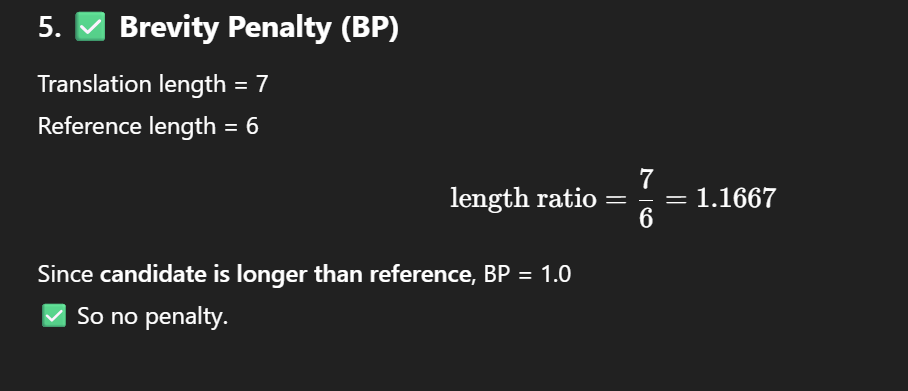

In [ ]:
from evaluate import load

bleu = load("bleu")

# Model-generated headline (prediction)
predictions = ["Government unveils new climate action plan"]

# Real human-written headline (reference)
references = [["Government announces new plan to fight climate change"]]

result = bleu.compute(predictions=predictions, references=references)
print("BLEU Score (Text Gen):", result)


BLEU Score (Text Gen): {'bleu': 0.0, 'precisions': [0.6666666666666666, 0.0, 0.0, 0.0], 'brevity_penalty': 0.7165313105737893, 'length_ratio': 0.75, 'translation_length': 6, 'reference_length': 8}


In [ ]:
from evaluate import load

rouge = load("rouge")

# Model-generated summary
predicted_summary = ["Hugging Face develops powerful AI tools."]

# Ground truth (human-written) summary
reference_summary = ["Hugging Face is a company that builds AI models."]

result = rouge.compute(predictions=predicted_summary, references=reference_summary)
print("ROUGE Scores:", result)


ROUGE Scores: {'rouge1': np.float64(0.4), 'rouge2': np.float64(0.15384615384615385), 'rougeL': np.float64(0.4), 'rougeLsum': np.float64(0.4)}


| Metric       | Meaning                    | Score | Why                         |
| ------------ | -------------------------- | ----- | --------------------------- |
| `ROUGE-1`    | Unigram recall             | 0.4   | 3/9 words matched           |
| `ROUGE-2`    | Bigram recall              | 0.15  | Only "Hugging Face" matched |
| `ROUGE-L`    | Longest Common Subsequence | 0.4   | "Hugging Face AI" is LCS    |
| `ROUGE-Lsum` | Sentence-level LCS         | 0.4   | Same as above (1 sentence)  |


| Feature                 | **BLEU (Bilingual Evaluation Understudy)**          | **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)** |
| ----------------------- | --------------------------------------------------- | ------------------------------------------------------------- |
| **Primary Focus**       | Precision (How much predicted is correct)           | Recall (How much reference is captured)                       |
| **N-gram type**         | 1-gram to 4-gram precision                          | 1-gram to 4-gram recall + LCS (ROUGE-L)                       |
| **Formula Style**       | \$BLEU = BP \times \exp(\text{avg log precision})\$ | \$ROUGE = \frac{\text{overlap}}{\text{reference length}}\$    |
| **Brevity Penalty**     | Yes — penalizes too-short output                    | No — doesn’t punish short outputs                             |
| **Best For**            | Machine Translation, factual generation             | Summarization, content preservation                           |
| **Fails When**          | Synonyms used, multiple valid outputs               | Extra irrelevant content is present                           |
| **Overlap type**        | Exact n-gram match (no flexibility)                 | Longest sequence, flexible phrasing                           |
| **Multiple References** | Supported                                           | Supported                                                     |
| **Interpretation**      | Higher BLEU = more precise and fluent output        | Higher ROUGE = more informative and complete output           |
| **Used In**             | Machine Translation, chatbot QA, factual generation | Summarization, headline generation                            |
| **Metric Values**       | 0 to 1 (or 0 to 100%)                               | 0 to 1 (or 0 to 100%)                                         |


In [ ]:
from evaluate import load

perplexity = load("perplexity")

# Sentence generated by your language model
predictions = ["The government announced a new climate policy today."]

# Evaluate how fluent/confident GPT2 is on this sentence
result = perplexity.compute(predictions=predictions, model_id="gpt2")
print("Perplexity:", result)


  0%|          | 0/1 [00:00<?, ?it/s]

Perplexity: {'perplexities': [42.04547119140625], 'mean_perplexity': np.float64(42.04547119140625)}


| Aspect         | Value                                                                                 |
| -------------- | ------------------------------------------------------------------------------------- |
| Sentence       | `"The government announced a new climate policy today."`                              |
| Model          | `gpt2` (English LM)                                                                   |
| Perplexity     | **42.04**                                                                             |
| Interpretation | GPT-2 is **moderately unsure** about this sentence — it's not fluent but not terrible |
| Ideal Value    | Lower = Better (e.g., <30 = fluent, >100 = confused model)                            |


What Does 42.04 Mean?
GPT-2 thinks this sentence is somewhat unnatural or less expected.

A perplexity score of 42 is not terrible, but not fluent-level either.

Ideally, for fluent, natural English:

Good = 10–30

Acceptable = 30–50

Bad = > 100 (very low confidence)

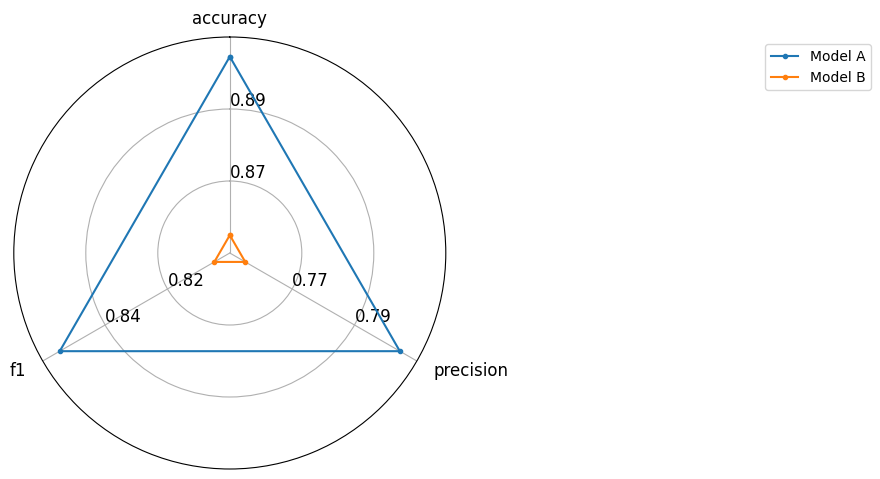

In [ ]:
import evaluate
from evaluate.visualization import radar_plot

data = [
    {"accuracy": 0.9, "precision": 0.8, "f1": 0.85},
    {"accuracy": 0.85, "precision": 0.75, "f1": 0.8}
]
model_names = ["Model A", "Model B"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()

## Huggingface_hub

In [ ]:
!pip install --upgrade "huggingface_hub>=0.33.1"

In [ ]:
from huggingface_hub import HfApi
api = HfApi()

In [ ]:
# Get model info without downloading it
model_info = api.model_info(repo_id="bert-base-uncased")

In [ ]:
print("Model Card Metadata:", model_info.card_data)
print("Tags:", model_info.tags)
print("Commit SHA:", model_info.sha)
print("Last Modified:", model_info.last_modified)
print("Files:", [f.rfilename for f in model_info.siblings])
print("Model ID:", model_info.card_data.get('modelId', 'Not available'))
print("Likes:", model_info.likes)
print("Author/Namespace:", model_info.author)
print("Is Private:", model_info.private)
print("Downloads:", model_info.downloads)

Model Card Metadata: datasets:
- bookcorpus
- wikipedia
language: en
license: apache-2.0
tags:
- exbert
Tags: ['transformers', 'pytorch', 'tf', 'jax', 'rust', 'coreml', 'onnx', 'safetensors', 'bert', 'fill-mask', 'exbert', 'en', 'dataset:bookcorpus', 'dataset:wikipedia', 'arxiv:1810.04805', 'license:apache-2.0', 'autotrain_compatible', 'endpoints_compatible', 'region:us']
Commit SHA: 86b5e0934494bd15c9632b12f734a8a67f723594
Last Modified: 2024-02-19 11:06:12+00:00
Files: ['.gitattributes', 'LICENSE', 'README.md', 'config.json', 'coreml/fill-mask/float32_model.mlpackage/Data/com.apple.CoreML/model.mlmodel', 'coreml/fill-mask/float32_model.mlpackage/Data/com.apple.CoreML/weights/weight.bin', 'coreml/fill-mask/float32_model.mlpackage/Manifest.json', 'flax_model.msgpack', 'model.onnx', 'model.safetensors', 'pytorch_model.bin', 'rust_model.ot', 'tf_model.h5', 'tokenizer.json', 'tokenizer_config.json', 'vocab.txt']
Model ID: Not available
Likes: 2389
Author/Namespace: google-bert
Is Private:

In [ ]:
models = api.list_models(search="emotion", sort="downloads", limit=5)

In [ ]:
for model in models:
    print(model.modelId, "-", model.downloads)

speechbrain/emotion-recognition-wav2vec2-IEMOCAP - 899301
j-hartmann/emotion-english-distilroberta-base - 783147
SamLowe/roberta-base-go_emotions - 544185
bhadresh-savani/distilbert-base-uncased-emotion - 488682
michellejieli/emotion_text_classifier - 209818


In [ ]:
models = api.list_models(filter="text-generation", sort="downloads", limit=10)

In [ ]:
for m in models:
    print(m.modelId, "-", m.downloads)

meta-llama/Llama-3.1-8B-Instruct - 12923117
context-labs/meta-llama-Llama-3.2-3B-Instruct-FP16 - 12913818
openai-community/gpt2 - 11605493
Qwen/Qwen2.5-7B-Instruct - 11284573
facebook/opt-125m - 9766327
openai/gpt-oss-20b - 8061283
meta-llama/Llama-3.2-1B-Instruct - 5137390
Qwen/Qwen3-4B-Base - 4880631
dphn/dolphin-2.9.1-yi-1.5-34b - 4814076
Qwen/Qwen3-8B - 4769589


In [ ]:
from huggingface_hub import list_repo_files

In [ ]:
files = list_repo_files("google/flan-t5-base")
print(files)

['.gitattributes', 'README.md', 'config.json', 'flax_model.msgpack', 'generation_config.json', 'model.safetensors', 'pytorch_model.bin', 'special_tokens_map.json', 'spiece.model', 'tf_model.h5', 'tokenizer.json', 'tokenizer_config.json']


In [ ]:
dataset = api.dataset_info("imdb")

In [ ]:
print("Description:", dataset.cardData.get("summary", "No summary"))
print("Files:", [f.rfilename for f in dataset.siblings])

Description: No summary
Files: ['.gitattributes', 'README.md', 'plain_text/test-00000-of-00001.parquet', 'plain_text/train-00000-of-00001.parquet', 'plain_text/unsupervised-00000-of-00001.parquet']


In [ ]:
from huggingface_hub import hf_hub_download
import json
# Download config.json
config_path = hf_hub_download(repo_id="bert-base-uncased", filename="config.json")
with open(config_path) as f:
    config = json.load(f)
print("Hidden size:", config["hidden_size"])

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Hidden size: 768


In [ ]:
from huggingface_hub import InferenceClient

# Use the correct hosted model ID with repository owner prefix
client = InferenceClient(model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

response = client.text_classification("I love Hugging Face! ")
print(response)

[TextClassificationOutputElement(label='POSITIVE', score=0.9998641014099121), TextClassificationOutputElement(label='NEGATIVE', score=0.0001358972367597744)]


In [ ]:
info = api.model_info("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
print("Pipeline tag:", info.pipeline_tag)

Pipeline tag: text-classification


In [ ]:
from huggingface_hub import HfApi

api = HfApi()
# Search text generation models with hosted inference support
models = api.list_models(filter="text-generation", limit=20)
print("Sample models with inference support:")
for m in models:
    if m.pipeline_tag == "text-generation":
        print("-", m.modelId)

Sample models with inference support:
- deepseek-ai/DeepSeek-V3.1
- ByteDance-Seed/Seed-OSS-36B-Instruct
- deepseek-ai/DeepSeek-V3.1-Base
- openai/gpt-oss-20b
- google/gemma-3-270m
- openai/gpt-oss-120b
- CohereLabs/command-a-reasoning-08-2025
- nvidia/NVIDIA-Nemotron-Nano-9B-v2
- NousResearch/Hermes-4-70B
- google/gemma-3-270m-it
- DatarusAI/Datarus-R1-14B-preview
- meta-llama/Llama-3.1-8B-Instruct
- NousResearch/Hermes-4-405B
- zai-org/GLM-4.5
- nvidia/NVIDIA-Nemotron-Nano-12B-v2-Base
- DavidAU/OpenAi-GPT-oss-20b-abliterated-uncensored-NEO-Imatrix-gguf


In [ ]:
from huggingface_hub import HfApi

api = HfApi()

# Pull only "warm" text-generation models served by HF-Inference, max 25 results
gen = api.list_models(
        inference_provider="hf-inference",
        pipeline_tag="text-classification",
        limit=25)

models = list(gen)
print(f"Found {len(models)} models")

Found 25 models


In [ ]:
models

[ModelInfo(id='distilbert/distilbert-base-uncased-finetuned-sst-2-english', author=None, sha=None, created_at=datetime.datetime(2022, 3, 2, 23, 29, 4, tzinfo=datetime.timezone.utc), last_modified=None, private=False, disabled=None, downloads=2931573, downloads_all_time=None, gated=None, gguf=None, inference=None, inference_provider_mapping=None, likes=819, library_name='transformers', tags=['transformers', 'pytorch', 'tf', 'rust', 'onnx', 'safetensors', 'distilbert', 'text-classification', 'en', 'dataset:sst2', 'dataset:glue', 'arxiv:1910.01108', 'doi:10.57967/hf/0181', 'license:apache-2.0', 'model-index', 'autotrain_compatible', 'endpoints_compatible', 'region:us'], pipeline_tag='text-classification', mask_token=None, card_data=None, widget_data=None, model_index=None, config=None, transformers_info=None, trending_score=9, siblings=None, spaces=None, safetensors=None, security_repo_status=None, xet_enabled=None),
 ModelInfo(id='ProsusAI/finbert', author=None, sha=None, created_at=date

In [ ]:
for model_name in models:
      print(model_name.modelId)


distilbert/distilbert-base-uncased-finetuned-sst-2-english
ProsusAI/finbert
nlptown/bert-base-multilingual-uncased-sentiment
j-hartmann/emotion-english-distilroberta-base
KoalaAI/Text-Moderation
protectai/deberta-v3-base-prompt-injection-v2
HuggingFaceFW/fineweb-edu-classifier
mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis
SamLowe/roberta-base-go_emotions
FacebookAI/roberta-large-mnli
bhadresh-savani/distilbert-base-uncased-emotion
cardiffnlp/twitter-xlm-roberta-base-sentiment
microsoft/Multilingual-MiniLM-L12-H384
shahrukhx01/question-vs-statement-classifier
unitary/multilingual-toxic-xlm-roberta
yangheng/deberta-v3-base-absa-v1.1
impira/layoutlm-document-classifier
WhitePeak/bert-base-cased-Korean-sentiment
borisn70/bert-43-multilabel-emotion-detection
tabularisai/multilingual-sentiment-analysis
openai-community/roberta-base-openai-detector
openai-community/roberta-large-openai-detector
AkshatSurolia/ICD-10-Code-Prediction
TheBritishLibrary/bl-books-genre
Hooshvare

In [ ]:
from huggingface_hub import InferenceClient

# Using a text classification model known to work with InferenceClient
client = InferenceClient(model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

out = client.text_classification(
        "I saw a puppy, a cat and a raccoon during my bike ride in the park.")
print(out)

[TextClassificationOutputElement(label='NEGATIVE', score=0.8336716294288635), TextClassificationOutputElement(label='POSITIVE', score=0.16632837057113647)]
